Surface

In [ ]:
from surface import surfaceGenerator
size=(500, 500)
wind_direction=0
surfaceGenerator=surfaceGenerator(PM_spectrum[0],Simple_Cosine_Spreads[0], wavenumbers, theta, wind_direction,size, facet=2.5, seconds=0, delta_t=1)
surface=surfaceGenerator.generate()

In [ ]:
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2
plt.imshow((surface[0,:,:]))
plt.gca().invert_yaxis()
#plt.xlim(0, size[0])
plt.colorbar()


In [ ]:
print(f"Variance {np.var(surface[0,:,:])}")
from scipy.integrate import quad
# print(quad(JONSWAP_Spectrum[0],*wavenumbers))
spectrum=JONSWAP_Spectrum[0]
spreading=LH_Spreads[0]
delta_k=np.diff(wavenumbers, prepend=wavenumbers[0])
delta_theta=np.diff(theta, prepend=theta[0])
A=spectrum.reshape(-1,1)*spreading#np.sqrt(2*spectrum.reshape(-1,1)*spreading*delta_k.reshape(-1,1)*delta_theta)
#aaa=np.trapz(A, k,axis=0)
print(f"Integral {np.trapz(np.trapz(A,wavenumbers, axis=0), x=theta, axis=0)}")
print(f"Significant wave height {4*np.sqrt(np.var(surface[0,:,:]))}")

In [ ]:
import numpy as np

Sx=np.gradient(surface[0,:,:],axis=0)
Sy=np.gradient(surface[0,:,:],axis=1)
# print(norm.cdf(Sx))
import matplotlib.pyplot as plt
plt.hist(Sx.flatten(), bins=50, density=True, alpha=0.5, label="Upwind Slopes");
plt.hist(Sy.flatten(), bins=50, density=True, alpha=0.5, label="Crosswind Slopes");
plt.legend()
print(f"Variance of slopes {np.var(Sx.flatten())+np.var(Sy.flatten())}")
A=(np.power(wavenumbers,2)*spectrum).reshape(-1,1)*spreading

print(f"Integral {np.trapz(np.trapz(A,wavenumbers, axis=0), x=theta, axis=0)}")      


In [3]:
from surface import surfaceGenerator
import numpy as np
surfaceGenerator=surfaceGenerator(length=512, facet=2,wind_speed=10,wind_direction=np.pi/2,seconds=5,timestep=0.5, fetch=80000)
Z=surfaceGenerator.generate()


0.18126181
0.1818214705541547


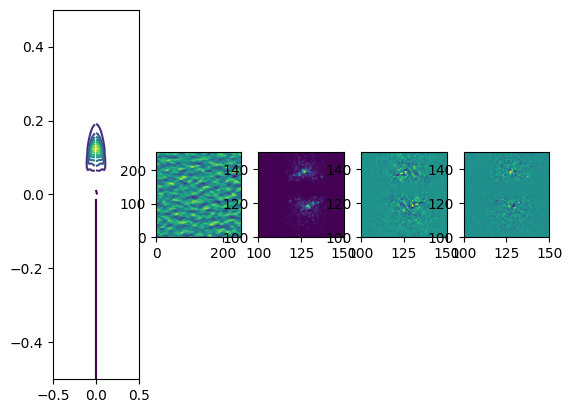

In [12]:
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1,ax2, ax3, ax4, ax5)=plt.subplots(1,5)
ax1.contour(surfaceGenerator.KX, surfaceGenerator.KY, surfaceGenerator.getPSI())
ax1.set_xlim(-0.5,0.5)
ax1.set_ylim(-0.5,0.5)

ax2.imshow(Z[0,:,:], origin="lower")

ax3.imshow(abs(np.fft.fftshift(np.fft.fft2(Z[0,:,:])))**2)
ax3.set_xlim(100,150)
ax3.set_ylim(100,150)

ax4.imshow(np.real(np.fft.fftshift(np.fft.fft2(Z[0,:,:]))))
ax4.set_xlim(100,150)
ax4.set_ylim(100,150)
ax5.imshow(np.imag(np.fft.fftshift(np.fft.fft2(Z[0,:,:]))))
ax5.set_xlim(100,150)
ax5.set_ylim(100,150)


# ax2.gca().invert_yaxis()
# plt.colorbar()
kx=surfaceGenerator.KX[0,:]
# print()
print(np.trapz(np.trapz(surfaceGenerator.getPSI(), surfaceGenerator.KX[0,:], axis=0), surfaceGenerator.KY[:,0]))
print(np.var(Z[0,:,:]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import omnidirectional_spectra
import spreading_functions
g=9.81
L=500
dx=2
N=int(L/dx)
x=np.linspace(-L/2,L/2,N)
y=np.linspace(-L/2,L/2,N)

kx_s = (2*np.pi*np.fft.fftfreq(N, dx)).astype(np.float32)
ky_s = (2*np.pi*np.fft.fftfreq(N, dx)).astype(np.float32)
kx, ky = np.meshgrid(kx_s, ky_s)

kx_res = kx[0, 1] - kx[0, 0]
ky_res = ky[1, 0] - ky[0, 0]

k = np.sqrt(kx**2 + ky**2)
good_k = np.where(k > np.min(np.array([kx_res, ky_res])) / 2.0)
kxn = np.zeros_like(kx, dtype=np.float32)
kyn = np.zeros_like(kx, dtype=np.float32)
kxn[good_k] = kx[good_k] / k[good_k]
kyn[good_k] = ky[good_k] / k[good_k]
kinv = np.zeros(k.shape, dtype=np.float32)
kinv[good_k] = 1./k[good_k]
theta = np.angle(np.exp(1j * (np.arctan2(ky, kx) ))).astype(np.float32)
omega = np.sqrt(np.float32(g) * k)
S = np.zeros(k.shape, dtype=np.float32)
D = np.zeros(k.shape, dtype=np.float32)
S[good_k] =omnidirectional_spectra.JONSWAP(k[good_k],10)
D[good_k] =spreading_functions.Longuet_Higgins(theta[good_k], 8)
wave_dirspec = (kinv) * S * D
np.random.seed(13)
random_cg = (1./np.sqrt(2) * (np.random.normal(0., 1., size=[N, N]) +1j * np.random.normal(0., 1., size=[N, N]))).astype(np.complex64)
wave_coefs=(N*N*np.sqrt(2.*wave_dirspec*kx_res*ky_res)*random_cg).astype(np.complex64)


In [ ]:
seconds=5
fps=30
frames=seconds*fps
time = np.arange(frames)*1/fps
Z=np.zeros((frames, N, N))
for frame, t in enumerate(time):
    wave_coefs_phased=(wave_coefs*np.exp(-1j*omega*t)).astype(np.complex64)
    Z[frame,:,:]=np.real(np.fft.ifft2(wave_coefs_phased))
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, Z, cmap='ocean')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Height')
# ax.set_title('Wave Field')
# plt.show()

# plt.imshow(Z,extent=[0, L, 0, L])
# print(np.var(Z))

In [ ]:
# %matplotlib widget
# from matplotlib.animation import FuncAnimation
# fig, ax = plt.subplots()
# L=512
# img = ax.imshow(Z[0,:,:], cmap='viridis',extent=[0, L, 0, L])
# # cbar=fig.colorbar(img)
# def update(frame):
#     img.set_data(Z[int(frame),:,:])  # Update the image data
#     ax.set_title(u"Frame {}°".format(frame))
#     return img,

# # Create the animation
# ani = FuncAnimation(fig, update, frames=10, interval=1)

# plt.show()

In [ ]:
aaa=None
a=np.array([1,2,3,4,5])
print(a[aaa])